# 彼得與狼：強化學習入門

在本教程中，我們將學習如何將強化學習應用於尋路問題。這個場景的靈感來自俄羅斯作曲家[謝爾蓋·普羅科菲耶夫](https://en.wikipedia.org/wiki/Sergei_Prokofiev)的音樂童話故事[《彼得與狼》](https://en.wikipedia.org/wiki/Peter_and_the_Wolf)。這是一個關於年輕的先鋒彼得的故事，他勇敢地走出家門，來到森林空地追捕一隻狼。我們將訓練機器學習算法，幫助彼得探索周圍的區域並建立一張最佳的導航地圖。

首先，讓我們匯入一堆有用的庫：


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## 強化學習概述

**強化學習**（Reinforcement Learning，簡稱 RL）是一種學習技術，通過進行多次實驗，讓我們能夠學習到某個**代理**在某個**環境**中的最佳行為。在這個環境中，代理應該有一個由**獎勵函數**定義的**目標**。

## 環境

為了簡化起見，我們假設彼得的世界是一個大小為 `width` x `height` 的方形棋盤。在這個棋盤上的每個格子可以是：
* **地面**，彼得和其他生物可以在上面行走
* **水域**，顯然無法在上面行走
* **樹**或**草地**——可以用來休息的地方
* **蘋果**，代表彼得很樂意找到的食物來餵飽自己
* **狼**，是危險的，應該避開

為了與這個環境互動，我們將定義一個名為 `Board` 的類。為了避免讓這個筆記本過於雜亂，我們已將所有與棋盤相關的代碼移至一個單獨的 `rlboard` 模組中，現在我們將導入該模組。你可以查看這個模組的內容，以了解實現細節的內部運作。


現在讓我們創建一個隨機棋盤，看看它的樣子：


In [4]:
# code block 1

## 行動與政策

在我們的例子中，彼得的目標是找到一顆蘋果，同時避開狼和其他障礙物。將這些行動定義為一個字典，並將它們映射到相應的座標變化組合。


In [5]:
# code block 2

我們的代理（Peter）的策略是由一個所謂的**政策**所定義。我們來看看最簡單的政策，稱為**隨機漫步**。

## 隨機漫步

首先，我們通過實現隨機漫步策略來解決我們的問題。


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## 獎勵函數

為了讓我們的策略更智能，我們需要了解哪些行動比其他行動「更好」。


In [8]:
#code block 5

## Q-Learning

建立一個 Q-表，或多維陣列。由於我們的棋盤具有 `width` x `height` 的尺寸，我們可以用形狀為 `width` x `height` x `len(actions)` 的 numpy 陣列來表示 Q-表：


In [9]:
# code block 6

將 Q-Table 傳遞給 `plot` 函數以便在棋盤上可視化該表：


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learning 的精髓：貝爾曼方程與學習算法

撰寫我們學習算法的偽代碼：

* 初始化 Q-表 Q，為所有狀態和行動賦予相同的數值
* 設定學習率 $\alpha\leftarrow 1$
* 重複模擬多次
   1. 從隨機位置開始
   1. 重複以下步驟
        1. 在狀態 $s$ 選擇一個行動 $a$
        2. 執行行動，移動到新狀態 $s'$
        3. 如果遇到遊戲結束條件，或總獎勵過低 - 結束模擬  
        4. 計算新狀態的獎勵 $r$
        5. 根據貝爾曼方程更新 Q-函數：$Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. 更新總獎勵並降低 $\alpha$。

## 探索與利用

最佳的方法是平衡探索與利用。隨著我們對環境的了解越來越多，我們會更傾向於遵循最佳路徑，但偶爾選擇未探索的路徑也是必要的。

## Python 實現

現在我們準備實現學習算法。在此之前，我們還需要一些函數，將 Q-表中的任意數值轉換為對應行動的概率向量：


In [10]:
# code block 7

我們在原始向量中加入少量的 `eps`，以避免在初始情況下所有向量組件相同時出現除以 0 的問題。

實際的學習算法，我們將進行 5000 次實驗，也稱為 **epochs**：


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

在執行此算法後，Q-表應更新為定義每個步驟中不同行動吸引力的值。在此處可視化該表：


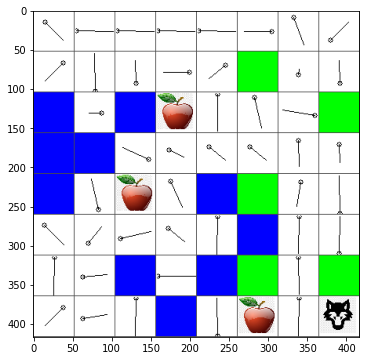

In [43]:
m.plot(Q)

## 檢查策略

由於 Q-Table 列出了每個狀態下各個行動的「吸引力」，因此利用它來定義我們世界中的高效導航是相當簡單的。在最簡單的情況下，我們只需選擇對應於 Q-Table 中最高值的行動：


In [13]:
# code block 9

2

如果你多次嘗試上述程式碼，你可能會注意到有時候它會「卡住」，需要按下筆記本中的停止按鈕來中斷執行。

> **任務 1：** 修改 `walk` 函數，限制路徑的最大長度為一定的步數（例如，100），並觀察上述程式碼是否會不時返回此值。

> **任務 2：** 修改 `walk` 函數，使其不會回到之前已經到過的地方。這將防止 `walk` 進入循環，但代理仍可能被「困住」在某個無法逃脫的位置。


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


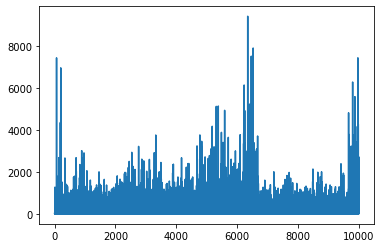

In [57]:
plt.plot(lpath)

## 練習
## 一個更真實的《彼得與狼》的世界



---

**免責聲明**：  
本文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。儘管我們努力確保翻譯的準確性，但請注意，自動翻譯可能包含錯誤或不準確之處。原始文件的母語版本應被視為權威來源。對於關鍵資訊，建議使用專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或誤釋不承擔責任。
